# Observations

https://highway-env.readthedocs.io/en/latest/observations/index.html

## Kinematics

In [6]:
### Kinematics
import gym
import highway_env

config = {
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 15,
        "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
        "features_range": {
            "x": [-100, 100],
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20]
        },
        "absolute": False,
        "order": "sorted"
    }
}
env = gym.make('highway-v0')
env.configure(config)
obs = env.reset()
print(obs)

[[ 1.          1.          0.04        1.          0.          1.
   0.        ]
 [ 1.          0.21919483  0.08       -0.35357687  0.          1.
   0.        ]
 [ 1.          0.43689284  0.08       -0.28227782  0.          1.
   0.        ]
 [ 1.          0.66704955 -0.04       -0.30293602  0.          1.
   0.        ]
 [ 1.          0.88408513 -0.04       -0.45557638  0.          1.
   0.        ]
 [ 1.          1.         -0.04       -0.25418303  0.          1.
   0.        ]
 [ 1.          1.         -0.04       -0.27612836  0.          1.
   0.        ]
 [ 1.          1.         -0.04       -0.39151908  0.          1.
   0.        ]
 [ 1.          1.         -0.04       -0.37065742  0.          1.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0

## Grayscale Image
The GrayscaleObservation is a W×H grayscale image of the scene, where W,H are set with the observation_shape parameter. The RGB to grayscale conversion is a weighted sum, configured by the weights parameter. Several images can be stacked with the stack_size parameter, as is customary with image observations.

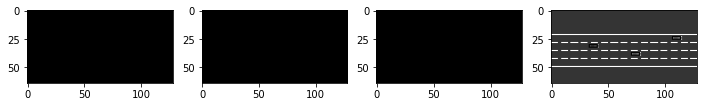

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
config = {
       "observation": {
           "type": "GrayscaleObservation",
           "observation_shape": (128, 64),
           "stack_size": 4,
           "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
           "scaling": 1.75,
       },
       "policy_frequency": 2
   }
env.configure(config)
obs = env.reset()

_, axes = plt.subplots(ncols=4, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
   ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

Illustration of the stack mechanism
We illustrate the stack update by performing three steps in the environment

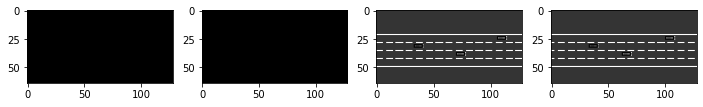

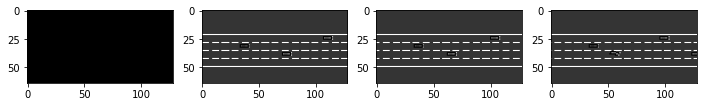

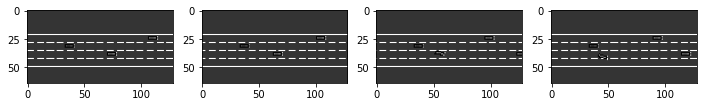

In [11]:
for _ in range(3):
    obs, _, _, _ = env.step(env.action_type.actions_indexes["IDLE"])

    _, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

## Occupancy grid
The OccupancyGridObservation is a W×H×F array, that represents a grid of shape W×H discretising the space (X,Y) around the ego-vehicle in uniform rectangle cells. Each cell is described by F features, listed in the "features" configuration field. The grid size and resolution is defined by the grid_size and grid_steps configuration fields.

In [18]:
# Example configuration
config = {
    "observation": {
            "type": "OccupancyGrid",
            "vehicles_count": 15,
            "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
            "features_range": {
                "x": [-100, 100],
                "y": [-100, 100],
                "vx": [-20, 20],
                "vy": [-20, 20]
            },
            "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
            "grid_step": [5, 5],
            "absolute": False
    }
}


env = gym.make('highway-v0')
env.configure(config)
obs = env.reset()
print(obs)

[[[ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    1.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          1.
    0.  

## Time to collision
The TimeToCollisionObservation is a V×L×H array, that represents the predicted time-to-collision of observed vehicles on the same road as the ego-vehicle. These predictions are performed for V different values of the ego-vehicle speed, L lanes on the road around the current lane, and represented as one-hot encodings over H discretised time values (bins), with 1s steps.

For instance, consider a vehicle at 25m on the right-lane of the ego-vehicle and driving at 15 m/s. Using V=3,L=3H=10, with ego-speed of {15 m/s, 20 m/s and 25 m/s}, the predicted time-to-collisions are ∞,5s,2.5s and the corresponding observation is

In [21]:
# Example configuration
config = {
    "observation": {
           "type": "TimeToCollision",
            "horizon": 10
    }
}


env = gym.make('highway-v0')
env.configure(config)
obs = env.reset()
print(obs)

[[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.  0.  0.  0.  0.  0.  0.  0.5 1.  1. ]
  [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]

 [[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.  0.  0.  0.5 1.  1.  0.  0.  0.  0. ]
  [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]

 [[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.  0.  1.  1.  0.5 0.  0.  0.  0.  0. ]
  [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]]


# Actions
https://highway-env.readthedocs.io/en/latest/actions/index.html

Similarly to observations, several types of actions can be used in every environment. They are defined in the action module. Each environment comes with a default action type, which can be changed or customised using environment configurations. For instance,

In [22]:
import gym
import highway_env

env = gym.make('highway-v0')
env.configure({
    "action": {
        "type": "ContinuousAction"
    }
})
env.reset()

array([[ 1.        ,  1.        ,  0.75      ,  0.41666667,  0.        ],
       [ 1.        ,  0.14303549, -0.25      , -0.13102057,  0.        ],
       [ 1.        ,  0.27539075, -0.5       , -0.12102915,  0.        ],
       [ 1.        ,  0.42447546, -0.75      , -0.14037006,  0.        ],
       [ 1.        ,  0.54705584, -0.75      , -0.16437442,  0.        ]])

## Continuous Actions
The ContinuousAction type allows the agent to directly set the low-level controls of the vehicle kinematics, namely the throttle a and steering angle δ.

The control of throttle and steering can be enabled or disabled through the longitudinal and lateral configurations, respectively. Thus, the action space can be either 1D or 2D.

## Discrete Meta-Actions

The DiscreteMetaAction type adds a layer of speed and steering controllers on top of the continuous low-level control, so that the ego-vehicle can automatically follow the road at a desired velocity. Then, the available meta-actions consist in changing the target lane and speed that are used as setpoints for the low-level controllers.

The full corresponding action space is defined in ACTIONS_ALL

ACTIONS_ALL = {
        0: 'LANE_LEFT',
        1: 'IDLE',
        2: 'LANE_RIGHT',
        3: 'FASTER',
        4: 'SLOWER'
    }
    
Some of these actions might not be always available (lane changes at the edges of the roads, or accelerating/decelrating beyond the maximum/minimum velocity), and the list of available actions can be accessed with get_available_actions() method. Taking an unavailable action is equivalent to taking the IDLE action.

Similarly to continuous actions, the longitudinal (speed changes) and lateral (lane changes) actions can be disabled separately through the longitudinal and lateral parameters. For instance, in the default configuration of the intersection environment, only the speed is controlled by the agent, while the lateral control of the vehicle is automatically performed by a steering controller to track a desired lane.

## Manual control

In [ ]:
env = gym.make("highway-v0")
env.configure({
    "manual_control": True
})
env.reset()
done = False
while not done:
    env.step(env.action_space.sample())  # with manual control, these actions are ignored